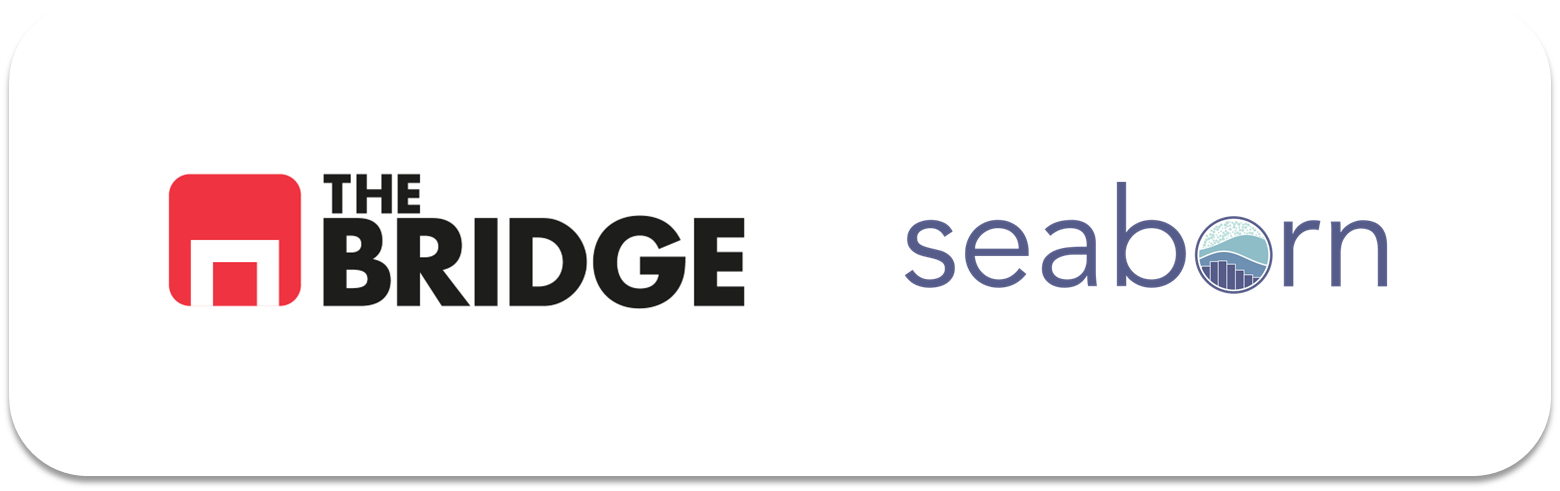

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [37]:
df = pd.read_csv("./data/california_cities.csv")

In [38]:
df.head(10)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
7,7,AmadorCity,38.419444,-120.824167,280.0,919.0,185,0.314,0.314,0.000,0.813,0.813,0.000,0.00
8,8,AmericanCanyon,38.168056,-122.252500,14.0,46.0,19454,4.845,4.837,0.008,12.548,12.527,0.021,0.17
9,9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [40]:
df.dropna(how= "any",inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [42]:

def diagrama_dispersion(df, x_col, y_col, categoria=None, tamano='area_total_km2', escala=1.0, colorbar=False):
    """
    Dibuja un diagrama de dispersión con escala de colores opcional y tamaño proporcional.
    """
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Escalar tamaño si se pasa como columna
    if isinstance(tamano, str):
        tamanos = df[tamano] * escala
    else:
        tamanos = tamano

    # Graficar con color si hay categoría
    if categoria:
        scatter = plt.scatter(
            df[x_col],
            df[y_col],
            c=df[categoria],
            cmap='viridis',
            s=tamanos,
            alpha=0.6,
            edgecolors='k',
            linewidths= 0.1
        )
        if categoria and colorbar:
            cbar = plt.colorbar(scatter)
            cbar.set_label(categoria)

        for size in [100, 200, 300, 400, 500, 600]:
            ax.scatter([], [], s=size * escala, c='black', alpha=0.4, label=f'{size}')

        legend = ax.legend(
        title=tamano,
        loc='upper right',
        ncols = 3,
        scatterpoints=1,
        labelcolor = "black",
        frameon=False,
        labelspacing=0.5,
        columnspacing = 0.5,
        title_fontsize='x-small'
    )

        
    else:
        plt.scatter(
            df[x_col],
            df[y_col],
            s=tamanos,
            alpha=0.6,
            edgecolors='k',
            linewidths=0.2
        )

    # Ejes
    plt.xlabel(x_col, size=8 )
    plt.xticks(fontsize=8)
    plt.ylabel(y_col, size=8)
    plt.yticks(fontsize=8)
    plt.grid(False)

 

    
    

    plt.tight_layout()
    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

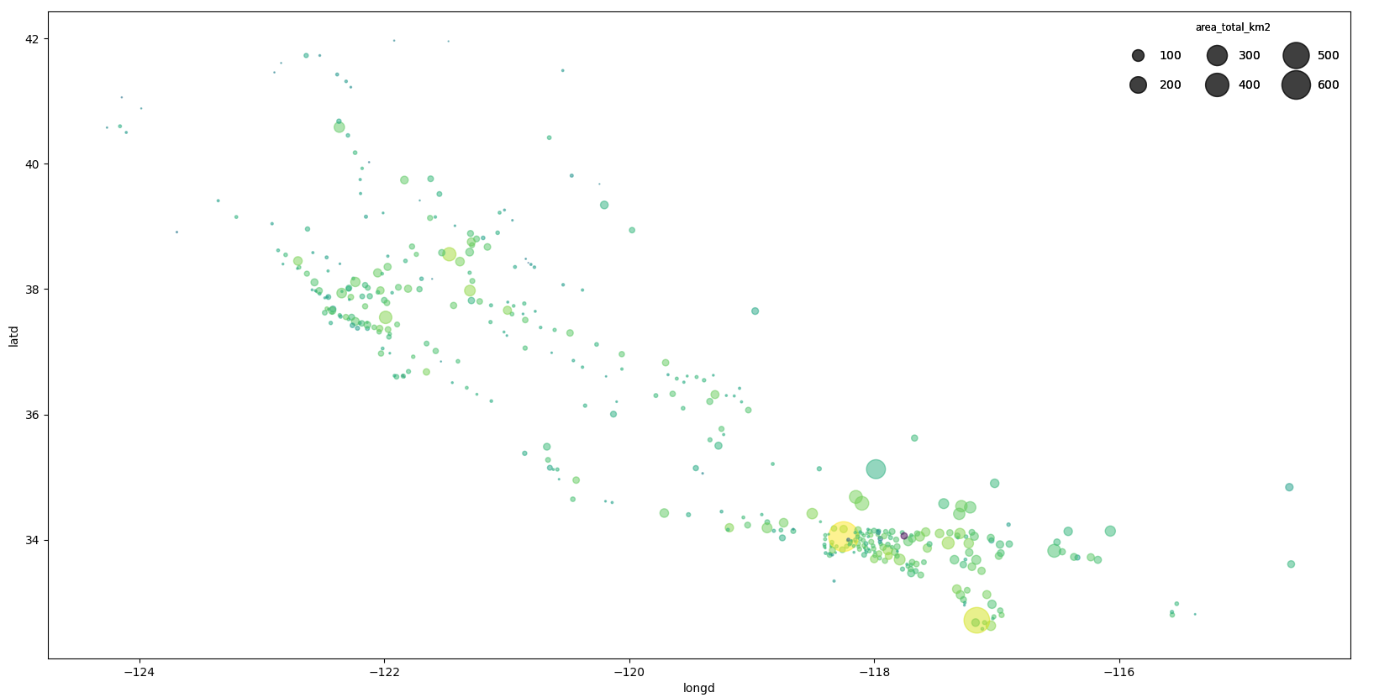

In [43]:
#Columna Log

df["population_total"] = pd.to_numeric(df["population_total"], errors='coerce')

# Eliminar o reemplazar valores nulos si es necesario
df = df.dropna(how = "any", subset=["population_total"])

# Calcular el logaritmo decimal
df["log_poblacion"] = np.log10(df["population_total"])

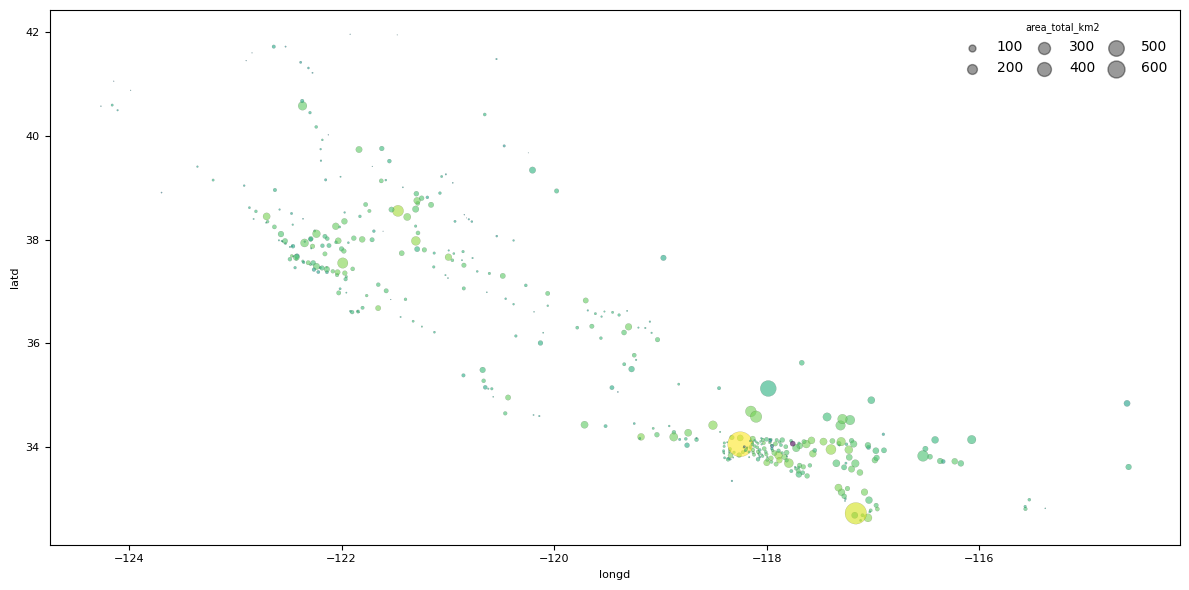

In [44]:
diagrama_dispersion(
    df=df,
    x_col="longd",
    y_col="latd",
    categoria="log_poblacion",
    tamano="area_total_km2",
    escala=1/4,
    colorbar=False  # No mostrar colorbar
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df_titanic.drop(columns = ["deck","survived", "pclass", "embarked"], inplace = True )

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]


In [9]:
df_titanic.drop(columns = ["parch","sibsp"], inplace = True )

In [10]:
mode_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(mode_embark_town)

mean_age_by_who = df_titanic.groupby('who')['age'].mean()
mean_age_by_who
mean_age_woman = mean_age_by_who['woman']
mean_age_man = mean_age_by_who['man']
mean_age_child = mean_age_by_who['child']

df_titanic['age'] = df_titanic['age'].fillna(df_titanic.groupby('who')['age'].transform('mean'))

In [12]:
df_titanic.isnull().mean()*100

sex               0.0
age               0.0
fare              0.0
class             0.0
who               0.0
adult_male        0.0
embark_town       0.0
alive             0.0
alone             0.0
family_members    0.0
dtype: float64

In [ ]:
#ALTA MORTALIDAD : 62 % no sobrevivieron = 549 
# Cúantos fallecen en accidentes de barcos?    
frecuencias_absolutas = df_titanic["alive"].value_counts()
frecuencias_relativas = df_titanic["alive"].value_counts(normalize = True) *  100
    
print(frecuencias_absolutas)
print(frecuencias_relativas)

alive
no     549
yes    342
Name: count, dtype: int64
alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64


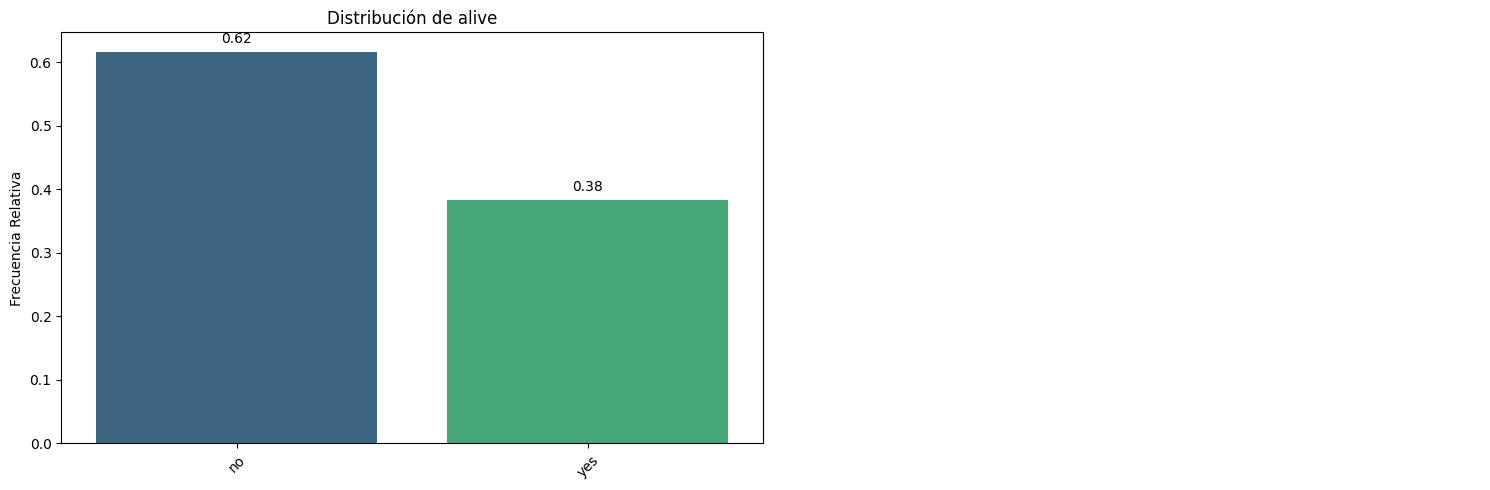

<Figure size 640x480 with 0 Axes>

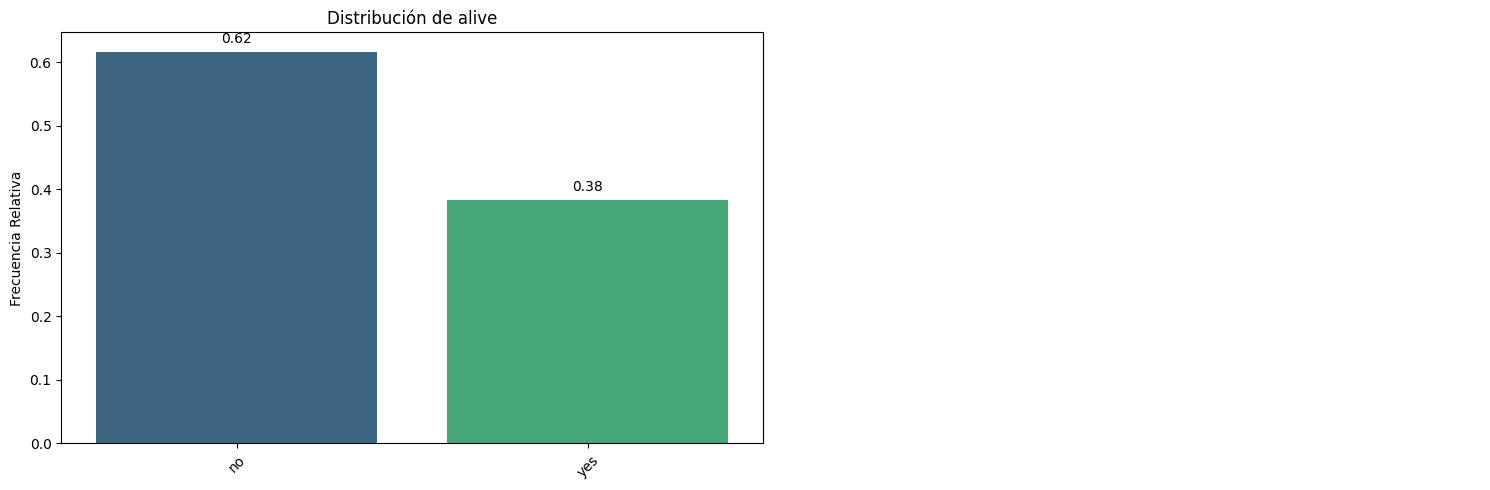

In [54]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
sns_plot = pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)
plt.savefig("barras_alive_titanic.png", dpi=300, bbox_inches='tight')


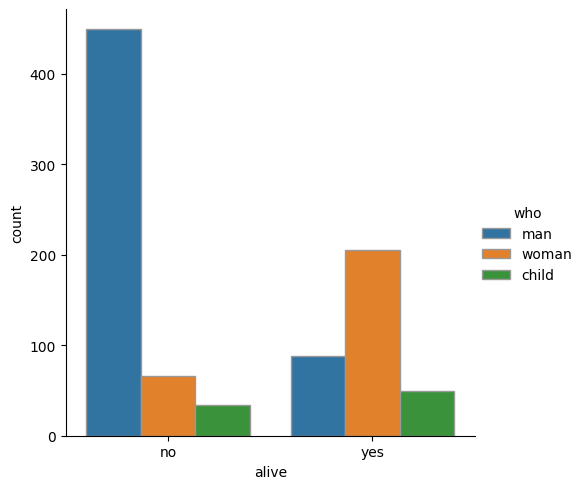

In [55]:
#"Mujeres y niños primero...."

sns.catplot(x="alive",
            hue = "who",
            kind="count", #me permire tipos de gráficos sobre variables
            edgecolor=".6",
            orient = "V",
            data= df_titanic.sort_values("alive"));

plt.savefig("barras_mujer_ninos_titanic.png", dpi=300, bbox_inches='tight')

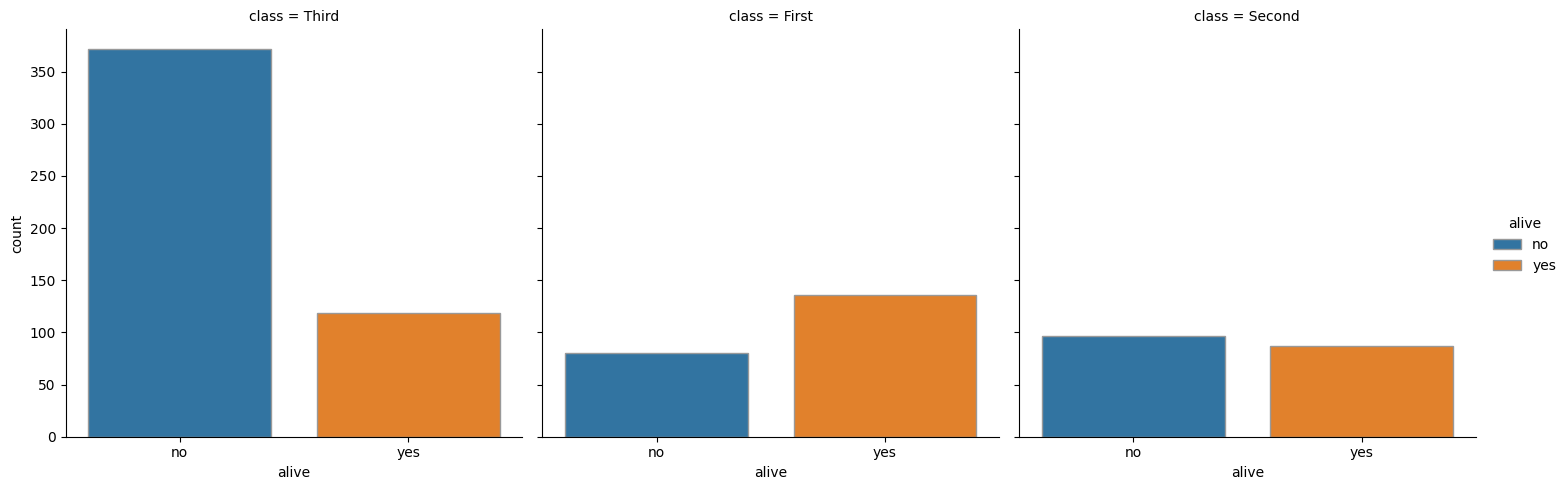

In [56]:
# Clase vs alive : Tabla de frecuencias absolutas  
sns.catplot(x="alive",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

plt.savefig("barras_class_alive_abs_titanic.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [18]:
cat_colx = "alive"
cat_coly= "class"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True) # * 100 o fucninaria, ahora lo tengo * 1
print(frecuencias_absolutas)
print(frecuencias_relativas)



    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


In [19]:
frecuencias_relativas["proportion"] *= 100

frecuencias_relativas

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


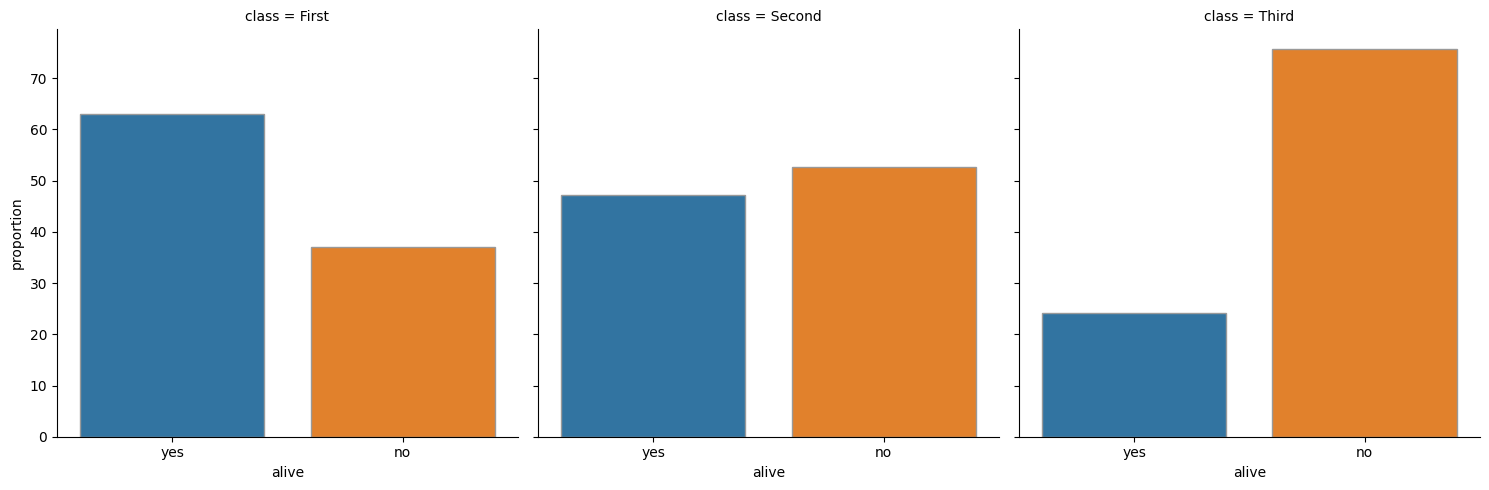

In [57]:
# Clase vs alive : Tabla de frecuencias relativas
#  

sns.catplot(x="alive",
            y = "proportion",
            col="class",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

plt.savefig("barras_class_alive_rel_titanic.png", dpi=300, bbox_inches='tight')

In [22]:

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


In [ ]:
#mujeres vs ninos

def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

       
#Para guardarlo, he cambiado la funcion para que no use plt.show()

plt.savefig("barras_mujeres_vs_ninos_titanic.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

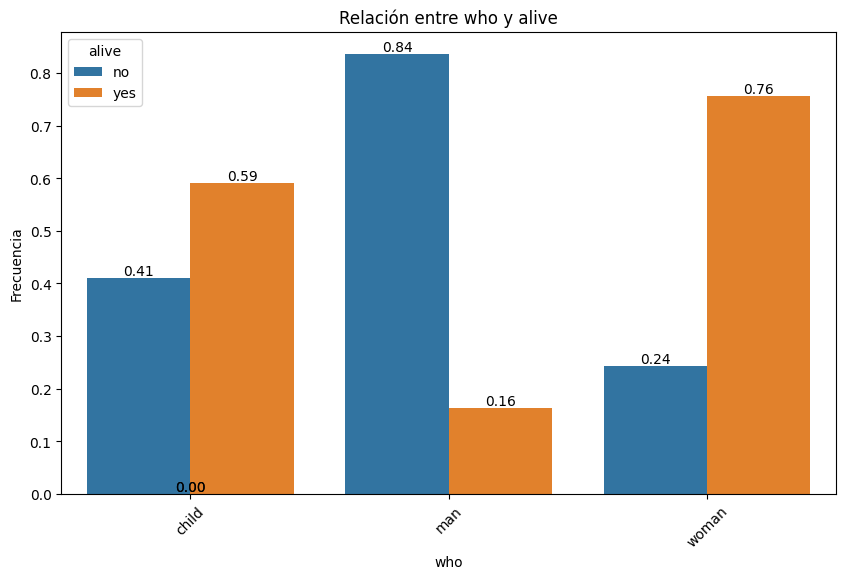

In [59]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)
plt.savefig("barras_mujeres_vs_ninos_titanic.png", dpi=300, bbox_inches='tight')

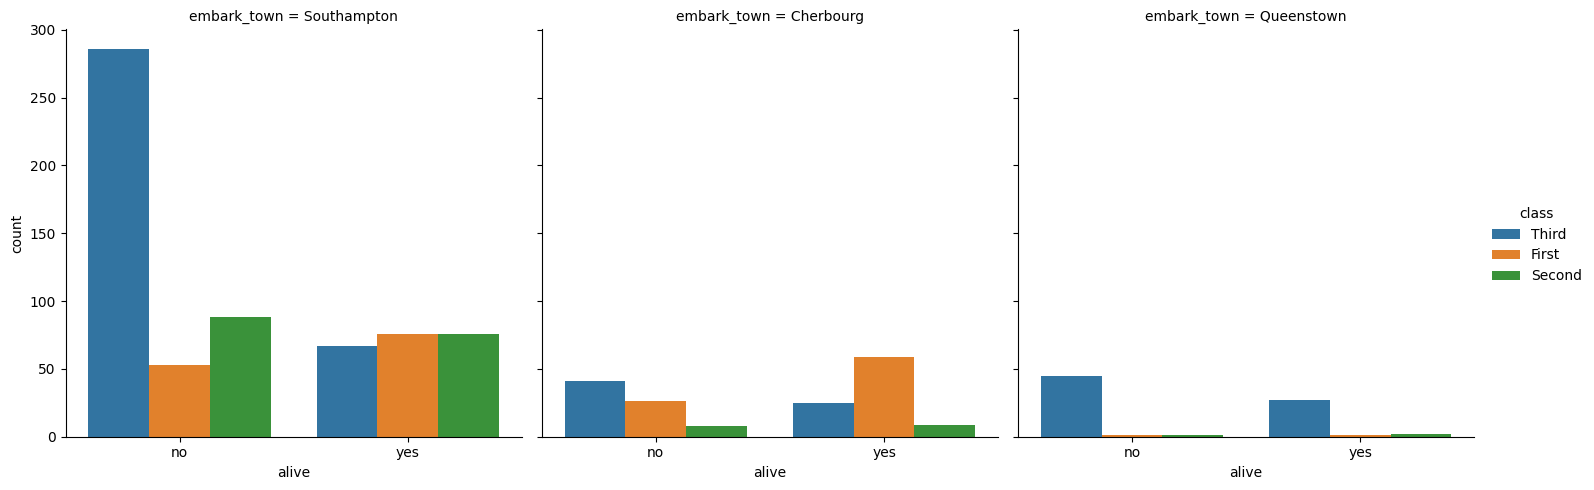

In [60]:
#Embark_town vs Class vs Alive 
# 
sns.catplot(x= "alive", col = "embark_town", hue = "class", data = df_titanic, kind = "count");

plt.savefig("barras_embarktown_vs_class_titanic.png", dpi=300, bbox_inches='tight')

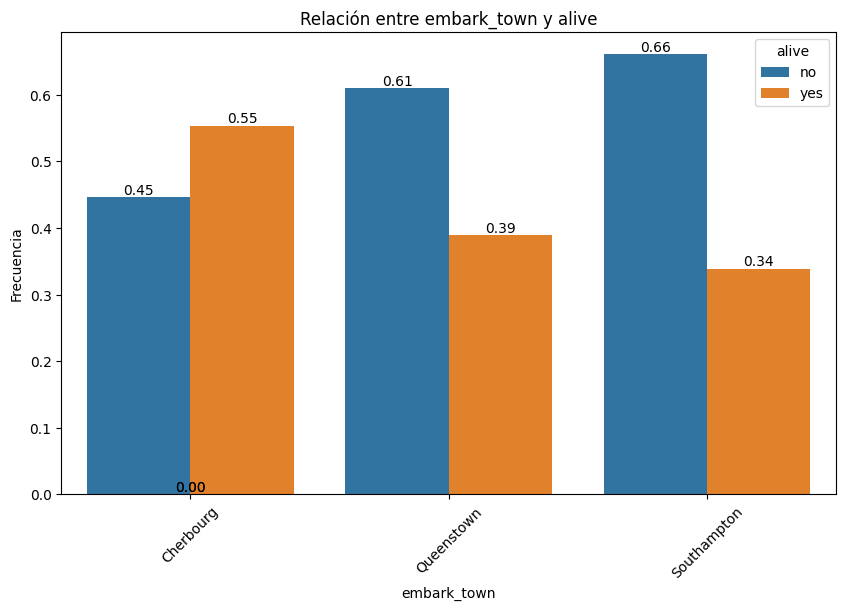

In [61]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq= True)
plt.savefig("barras_embarktown_vs_class_rel_titanic.png", dpi=300, bbox_inches='tight')